# **Perceptrón multicapa (MLP)**

CIFAR-10 es una colección de 60,000 imágenes a color de 32x32 pixeles

Se clasifican en exactamente 10 clases.

In [4]:
# Importamos librerias
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import datasets, utils

# Obtenemos las base de datos de CIFAR-10. La dividimos en dos tuplas:
# 1. Train, 2. Test
(train_images, train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

NUM_CLASSES = 10

# Se escalan las imágenes de 0-255 a 0-1, porque las NN (Neural Networks)
# trabajan mejor cuando el valor absoluto de cada entrada en menor a 1.
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

# Codificación One-hot: Convertir las clases en un arreglo plano
print("============================")
print("=== CODIFICACIÓN ONE-HOT ===")
print("============================")
print("=== Antes ===")
print("train_labels.shape: ", train_labels.shape)
print("Etiqueta: ",train_labels[1])
print("test_labels.shape: ", test_labels.shape)
print("Etiqueta: ",test_labels[1])

train_labels = utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = utils.to_categorical(test_labels, NUM_CLASSES)

print("=== Después ===")
print("train_labels.shape: ", train_labels.shape)
print("Etiqueta: ",train_labels[1])
print("test_labels.shape: ", test_labels.shape)
print("Etiqueta: ",test_labels[1])


=== CODIFICACIÓN ONE-HOT ===
=== Antes ===
train_labels.shape:  (50000, 1)
Etiqueta:  [9]
test_labels.shape:  (10000, 1)
Etiqueta:  [8]
=== Después ===
train_labels.shape:  (50000, 10)
Etiqueta:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
test_labels.shape:  (10000, 10)
Etiqueta:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Building the Model

In [5]:
# Importamos librerías
from tensorflow.keras import layers, models

# ===============================
# === Usando Sequential model ===
# ===============================
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200,activation = 'relu'),
    layers.Dense(150,activation = 'relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()

# ===============================
# === Usando la Fuctional API ===
# ===============================
input_layers = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layers)
x = layers.Dense(units=200,activation='relu')(x)
x = layers.Dense(units=150,activation='relu')(x)
output_layer = layers.Dense(units=10,activation='softmax')(x)
model = models.Model(input_layers,output_layer)
model.summary()

# =================================
# === OTRA FORMA DE USAR LA API ===
# =================================
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(150,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

# 3 formas posibles de realizar el mismo modelo (secuencial).
# Es recomendable usar el cualquiera de las últimas dos formas

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               614600    
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 

## **Explicación**

**Flatten** - Aplana los datos (32x32x3 = 3072)

**Dense** - Capa interconectada con todas las neuronas anteriores, (3,072 + 1)*200 = 614,600

**2da capa Densa** - (200+1)*150 = 30150

**Capa final** - (150+1)*10 = 1510

**Total params** 614,600 + 30150 + 1510 = 646,260

Se suma 1 porque cada unidad neuronal tiene una unidad de 'bias' extra que siempre envía un '1'.

**None** - Marcado de la 1era dimensión para mostrar que aún no conce el número de observaciones (datos) que serán proporcionados a la red.

Facilmente podemos pasar sola una observación o 1,000 a la vez, gracias a que los TENSORES se manejan con ÁLGEBRA LINEAL.


## **Compiling the model**

In [6]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Loss function - Compara la predicción con el valor de real.
#                 Normalmente se ocupan: Mean squared Error,
#                 Categorical cross-entropy y binary cross-entropy
#  __________________________________________
# |       PROBLEMA         |  LOSS FUNCTION  |
# |________________________|_________________|
# |       Regresión        |                 |
# |   (salida continua)    |       MSE       |
# |________________________|_________________|
# | Clasificación múltiple |   Categorical   |
# | (cada dato pertenece   |  cross-entropy  |
# |    a varias clases)    |                 |
# |________________________|_________________|
# | Clasificación binaria  |     Binary      |
# | (Cada dato pertence    |  cross-entopy   |
# | solo a una sola clase) |                 |
# |________________________|_________________|


**Optimizador** - Algoritmo que actualizará los pesos en la red neuronal basado en el gradiente (derivada) de la función de pérdida. Adam, RMSProp son los más comunes

**Learning Rate** - Qué tanto cambian los pesos en cada paso.

## **Training the Model**

In [7]:
model.fit(train_images, train_labels,
          # Cuántas observaciones serán proporcionadas en cada paso.
          # Normalmente de 32-256.
          batch_size = 32,
          # Cuántas veces la red será entrenada con todos los datos
          epochs= 10,
          # Los lotes (batches) serán proporcionados de manera aleatoria
          # en cada paso. No los intercambia con los datos de otros lotes.
          shuffle = True)

# Fordward propagation - Proceso de aprendizaje de la red obtiene
#                        los parámetros. (Va hacia delante)
# Backward propagation - Proceso de aprendizaje de la red donde actualiza
#                        los pesos.

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8465 - accuracy: 0.3354
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6572 - accuracy: 0.4077
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5825 - accuracy: 0.4367
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5308 - accuracy: 0.4556
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4918 - accuracy: 0.4712
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4597 - accuracy: 0.4822
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4324 - accuracy: 0.4916
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4083 - accuracy: 0.4974
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3875 - accuracy: 0.5060
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.359

**Fordward propagation** - Proceso de aprendizaje de la red obtiene
                        los parámetros. (Va hacia delante)
                        
**Backward propagation** - Proceso de aprendizaje de la red donde actualiza
                       los pesos.

## **Evaluating the Model**

In [8]:
model.evaluate(test_images, test_labels)
# O también
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4270 - accuracy: 0.4947
0.49470001459121704


## **Model Predictions**

In [9]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer',
                    'dog','frog','horse','ship','truck'])
preds = model.predict(test_images)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(test_labels,axis=-1)]
# axis=-1 - Le dice a la función que colapse el arreglo sobre la última
# dimensión (la dimensión de clase) de tal forma que la forma es [10000,1]
print(preds.shape)
print(preds_single.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
(10000,)


## **Observar imágenes**

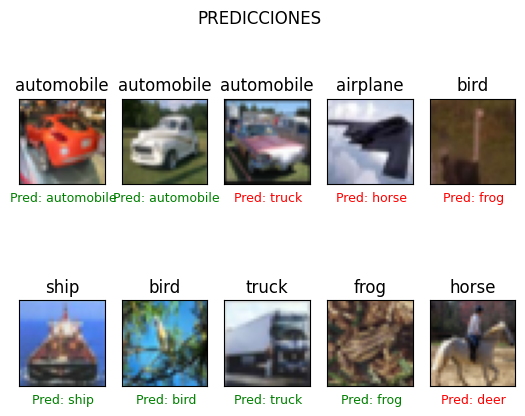

In [10]:
import matplotlib.pyplot as plt

num = 10
# Serán seleccionados 10 índices de manera aleatoria de entre 10,000
indices = np.random.choice(range(len(test_images)),num)
fig,ax = plt.subplots(2,5)
fig.suptitle("PREDICCIONES")
# Enumerate da la clave para cada valor de indices

for row in range(2):
  for column in range(5):
    # Obtenemos índices dle 1 al 10
    idx = column+1+(row*5)
    # Imprimimos del 0 al 9
    img = test_images[indices[idx-1]]
    ax[row,column].imshow(img)
    #Mostramos el título
    ax[row,column].set_title(actual_single[indices[idx-1]])

    # Quitamos los ticks
    ax[row,column].set_xticks([])
    ax[row,column].set_yticks([])

    # Si es correcto, se imprime de color verde,
    # de lo contrario, se imprime de color roo
    if preds_single[indices[idx-1]] == actual_single[indices[idx-1]]:
      color = 'g'
    else:
      color = 'r'

    # x,y,texto,
    ax[row,column].text(16,38,"Pred: "+str(preds_single[indices[idx-1]]),
                        ha='center',fontsize=9,color=color)
plt.show()